# WITH PANDAS AND MATPLOTLIB

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [13]:
df=pd.read_csv("PoliceKillingsUS.csv",encoding="windows-1252")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1: Plot number of people by gender

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


<AxesSubplot:xlabel='gender'>

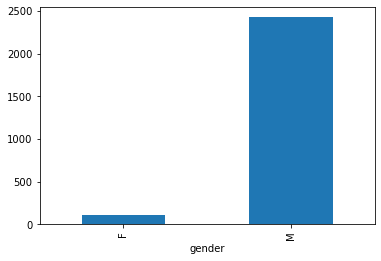

In [20]:
# with pandas
df.groupby("gender")["gender"].count().plot.bar()

Text(0, 0.5, 'Number')

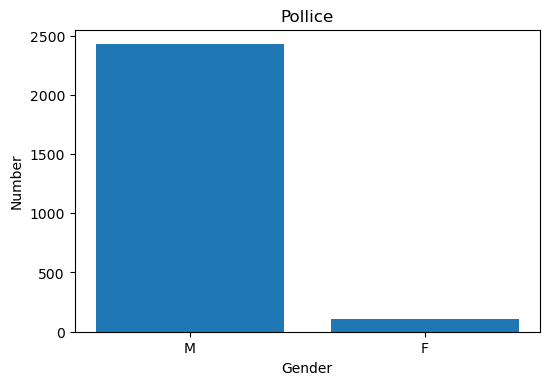

In [24]:
# with matplotlib
plt.figure(figsize=(6,4),dpi=100)
y=df.gender.value_counts().values
x=df.gender.value_counts().index
plt.bar(x,y)
plt.title("Pollice")
#plt.text("index","value",str(value))
plt.xlabel("Gender")
plt.ylabel("Number")

## 2: Plot 7 most common kill weapons

In [25]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [27]:
y=df.armed.value_counts()[:7].values
x=df.armed.value_counts()[:7].index

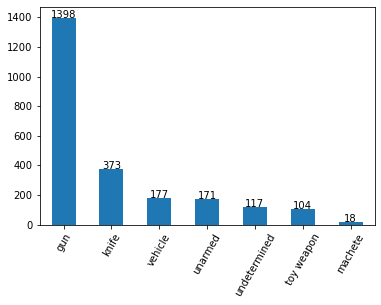

In [34]:
df.armed.value_counts()[:7].plot.bar()
plt.xticks(rotation=60);
for index,value in enumerate(y):
    plt.text(index,value, str(value),ha="center",va="")
    

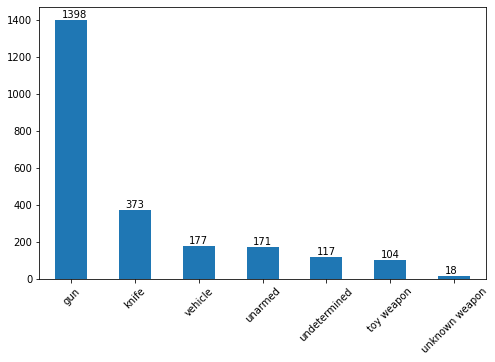

In [ ]:
# with pandas


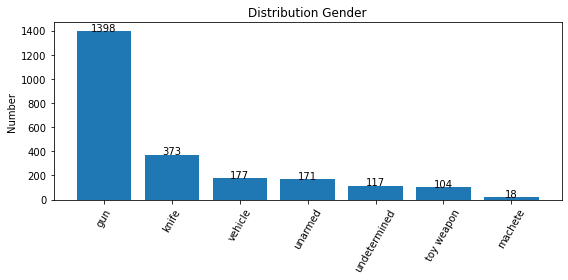

In [41]:
# with matplotlib
fig,ax=plt.subplots(figsize=(8,4))
ax.set_ylabel("Number")
ax.set_title("Distribution Gender")
ax.bar(x,y)
plt.xticks(rotation=60)
fig.tight_layout()
for index,value in enumerate(y):
    plt.text(index,value,str(value),ha="center")

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [ ]:
age=pd.DataFrame()

In [ ]:
old=(df.age<=25)

In [102]:
old.isnull().sum()

0

In [99]:
old.dropna().isnull().sum()

0

In [100]:
old=age.dropna()

NameError: name 'age' is not defined

<AxesSubplot:>

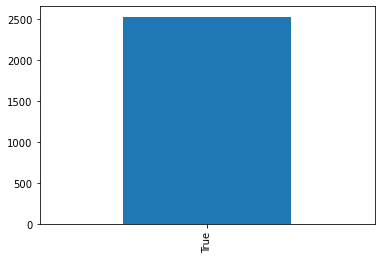

In [101]:
(old<=25).value_counts().plot.bar()

In [78]:
j=df.age<=25
k=df.age>25
df["ebove25"]= k

In [79]:
df.ebove25.value_counts()

True     1905
False     630
Name: ebove25, dtype: int64

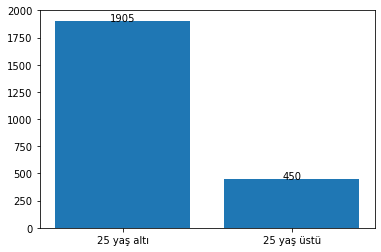

In [67]:
plt.bar(["25 yaş altı","25 yaş üstü"],[a,b]);
for index,value in enumerate([a,b]):
    plt.text(index,value,str(value),ha="center")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


above25    1905
below25     630
Name: age_cat, dtype: int64

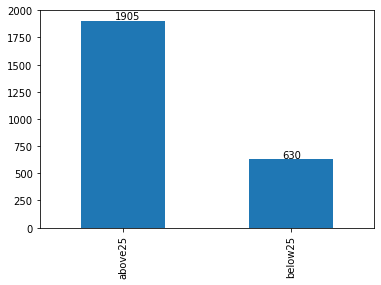

In [ ]:
# with pandas


In [ ]:
plt.

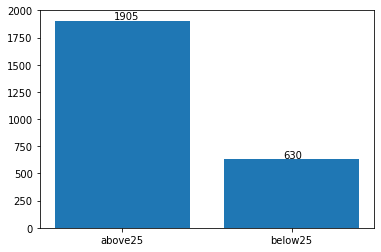

In [ ]:
# with matplotlib

## 4: Plot number of killed poeple by race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

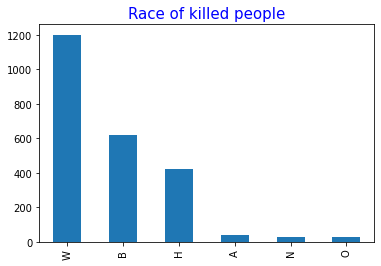

In [ ]:
# with pandas


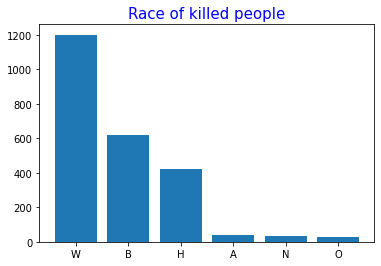

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

array([1168,  592,  401,   36,   29,   28])

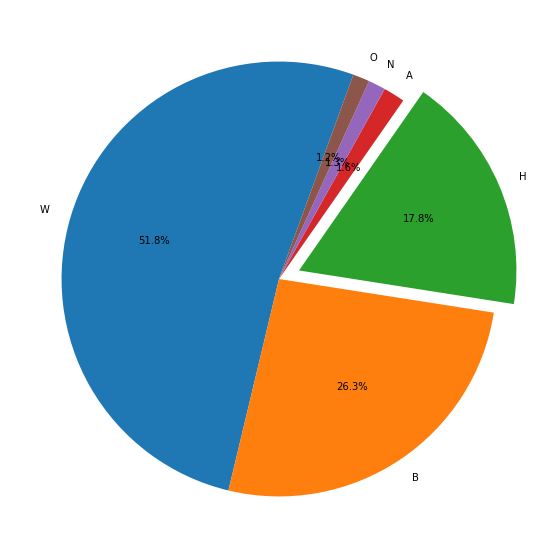

In [ ]:
# matplotlib



## 6: Most common 15 Name or Surname of killed people 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


(2254, 15)

Daquan Antonio Westbrook    2
Michael Johnson             2
Eric Harris                 2
Michael Brown               2
Brandon Jones               2
                           ..
Wayne Donald Dorsey         1
Matthew Vincent Wood        1
Taylor Hodge                1
David L. Anderson           1
Jovany Martinez             1
Name: name, Length: 2249, dtype: int64

In [ ]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [ ]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

(2253,)

['Tim', 'Elliot']

'Tim'

5339

Counter({'Tim': 3,
         'Elliot': 1,
         'Lewis': 7,
         'Lee': 37,
         'Lembke': 1,
         'John': 36,
         'Paul': 16,
         'Quintero': 2,
         'Matthew': 22,
         'Hoffman': 2,
         'Michael': 82,
         'Rodriguez': 13,
         'Kenneth': 17,
         'Joe': 9,
         'Brown': 17,
         'Arnold': 2,
         'Buck': 3,
         'Brock': 2,
         'Nichols': 3,
         'Autumn': 1,
         'Steele': 1,
         'Leslie': 2,
         'Sapp': 2,
         'III': 9,
         'Patrick': 13,
         'Wetter': 1,
         'Ron': 2,
         'Sneed': 1,
         'Hashim': 1,
         'Hanif': 1,
         'Ibn': 1,
         'Abdul-Rasheed': 1,
         'Nicholas': 13,
         'Ryan': 16,
         'Brickman': 1,
         'Omarr': 1,
         'Julian': 3,
         'Maximillian': 1,
         'Jackson': 9,
         'Loren': 3,
         'Simpson': 4,
         'James': 47,
         'Dudley': 1,
         'Barker': 2,
         'Artago': 1,
     

[('Michael', 82),
 ('David', 53),
 ('James', 47),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('Lee', 37),
 ('John', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('Smith', 31),
 ('J.', 30),
 ('Johnson', 29),
 ('Joshua', 27)]

,name_or_surname_most_frequency,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


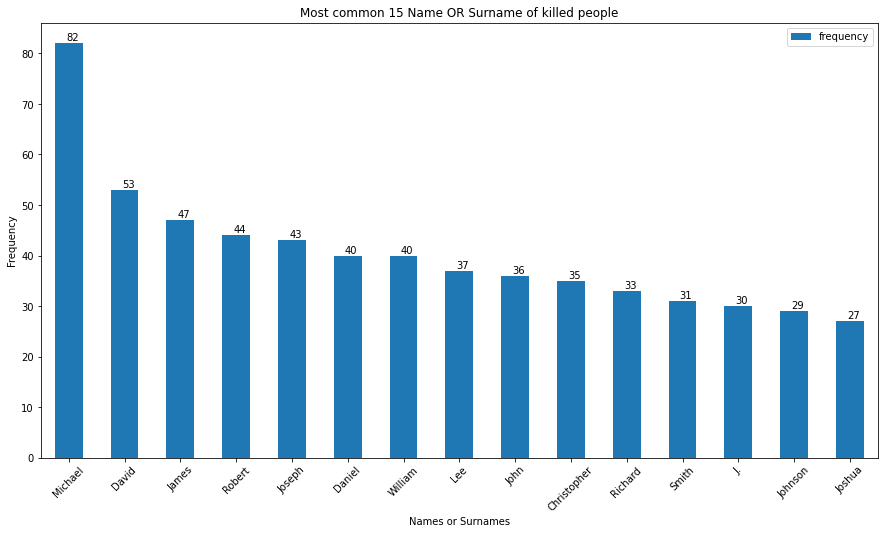

In [ ]:
# with pandas


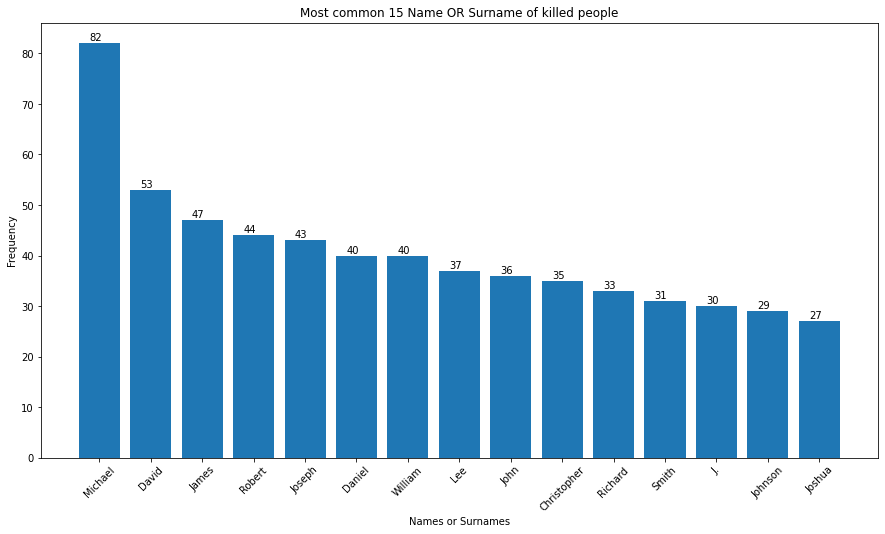

In [ ]:
# with matplotlib
